In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import utils

In [7]:
METHODS = ['SKOPT','BASINHOPPING','RANDOM','LSTM-MIN-RBF', 'LSTM-MIN-MATERN32']


SKOPT found : -34.539121
BASINHOPPING found : -50.157460
RANDOM found : -30.198641
LSTM-MIN-RBF found : -29.146328
LSTM-MIN-MATERN32 found : -36.175688


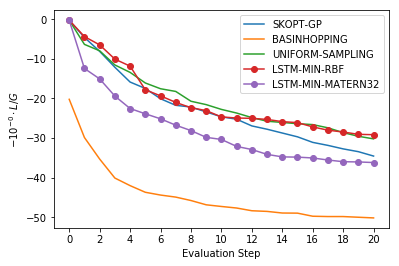

In [13]:
# METHODS = ['SKOPT-GP', 'SKOPT-GBRT', 'RANDOM', 'LSTM-MIN']

def load_data(method, normalization, prefix=""):
    output_dir = utils.loadConfig()['airfoil_optimization']['output_dir']
    filename = '%s/normalize-%d/%s%s-samples_y.npy' % (output_dir, normalization, prefix, method)
    sample_y = np.load(filename)
    return sample_y

def plot_data(normalization, prefix = ""):
    
    for i in METHODS:
        y, _ = utils.average_min_found_values_across_rows(load_data(i.lower(), normalization, prefix=prefix ))
        print('%s found : %f' % (i,y[-1]))
        if i == 'RANDOM':
            i = 'UNIFORM-SAMPLING'
        elif i == 'SKOPT':
            i = 'SKOPT-GP'
        if i in ['LSTM-MIN-MATERN32', 'LSTM-MIN-RBF'] :
            plt.plot(y, label=i, marker='o')
        else:
            plt.plot(y, label=i)
    plt.xticks(range(0,21,2))
    plt.ylabel('$-10^{%.0f}\\cdot L/G$' % (-np.log10(normalization)) )
    plt.xlabel('Evaluation Step')
#     plt.legend()

plot_data(normalization=1)
plt.legend()

SKOPT found : -34.539121
BASINHOPPING found : -50.157460
RANDOM found : -30.198641
LSTM-MIN-RBF found : -29.146328
LSTM-MIN-MATERN32 found : -36.175688


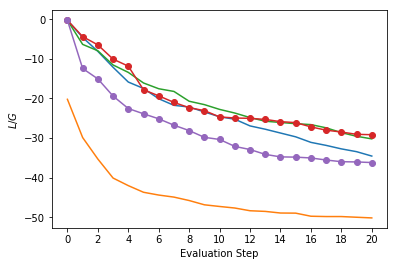

In [14]:
plot_data(normalization=1)
plt.ylabel('$L/G$')

In [36]:
import matplotlib.pylab as pylab
params = {
    'axes.labelsize': 'medium',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium'
}
pylab.rcParams.update(params)

SKOPT found : -34.539121
BASINHOPPING found : -50.157460
RANDOM found : -30.198641
LSTM-MIN-RBF found : -29.146328
LSTM-MIN-MATERN32 found : -36.175688
----
SKOPT found : -0.355713
BASINHOPPING found : -0.517854
RANDOM found : -0.318121
LSTM-MIN-RBF found : -0.354442
LSTM-MIN-MATERN32 found : -0.376101
----
SKOPT found : -0.638440
BASINHOPPING found : -0.436282
RANDOM found : -0.507999
LSTM-MIN-RBF found : -0.786447
LSTM-MIN-MATERN32 found : -0.809083


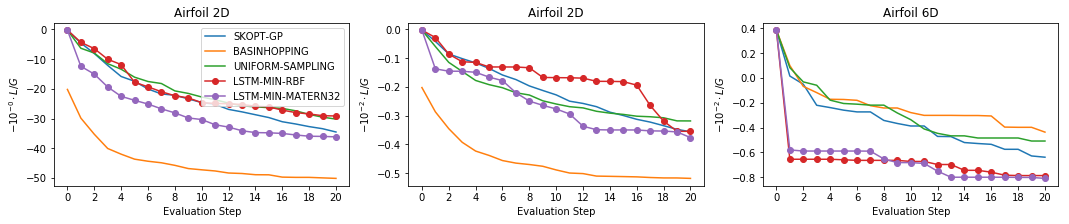

In [42]:
count = 1
plt.figure(figsize=(18,3))
for i in [1,100]:
    plt.subplot(1,3,count)
    plot_data(normalization=i)
    print('----')
    if count == 1:
        plt.legend()
    count = count + 1
    
    plt.title('Airfoil 2D')
for i in [100]:
    plt.subplot(1,3,count)
    plot_data(normalization=i, prefix="6d-")
    plt.title('Airfoil 6D')
    count = count + 1
# plt.title('Airfoil 6d with $y_i\in [-0.2,0.2]$')
# plt.legend()
# plt.savefig('airfoil-opt.svg')

In [159]:
def plot_1_over_norm(method):
    output_dir = utils.loadConfig()['airfoil_optimization']['output_dir']
    filename = '%s/normalize-1-over/%s-samples_y.npy' % (output_dir, method)
    sample_y = np.load(filename)
    return sample_y
sy_one_over = plot_1_over_norm('lstm-min-rbf')

In [161]:
xx = utils.average_min_found_values_across_rows(sy_one_over)

SKOPT found : -0.638440
BASINHOPPING found : -0.436282
RANDOM found : -0.507999
LSTM-MIN-RBF found : -0.786447
LSTM-MIN-MATERN32 found : -0.809083
----


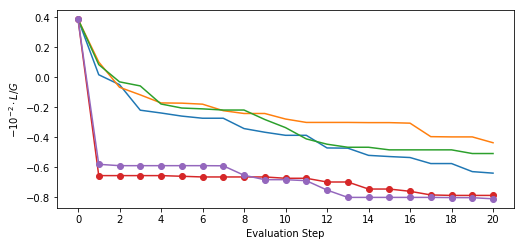

In [41]:
METHODS = ['SKOPT', 'BASINHOPPING','RANDOM','LSTM-MIN-RBF', 'LSTM-MIN-MATERN32']

count = 1
plt.figure(figsize=(18,8))
for i in [100]:
    plt.subplot(2,2,count)
    plot_data(normalization=i, prefix="6d-")
    print('----')
#     if count == 1:
#         plt.legend()
    count = count + 1
# plt.title('Airfoil 6d with $y_i\in [-0.2,0.2]$')
# plt.legend()

In [382]:
def plot_invalid_points(normalization, prefix=""):
    
    for i in METHODS:
        dd = load_data(i.lower(), normalization, prefix=prefix)
        y = np.sum(dd == 1.0 / normalization, axis=0)
        print(y)
        if i == 'LSTM-MIN-MATERN32':
            plt.plot(y, label=i, marker='o')
        else:
            plt.plot(y, label=i)
    plt.title('Normalized by %d' % normalization)
    plt.xticks(range(0,21,2))
#     plt.yticks(np.arange(0,100,0.2))
    plt.ylabel('Invalid Foil Count ')
    plt.xlabel('Evaluation Step')


[0 3 1 1 3 1 3 4 5 3 0 3 0 5 1 4 2 2 4 3 5]
[0 3 1 3 2 4 6 7 5 5 5 3 5 4 4 7 7 4 5 6 8]
[0 3 2 1 0 4 5 3 4 0 2 6 3 2 2 1 6 5 5 2 3]
[0 0 1 1 0 0 7 0 1 3 0 8 0 0 0 0 1 1 1 3 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0]


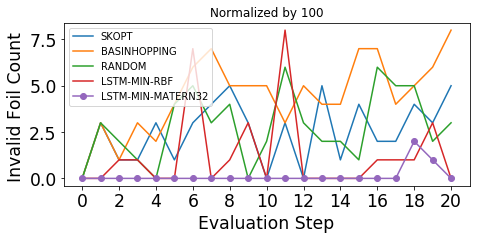

In [383]:
plt.figure(figsize=(16,3))
# plt.subplot(1,2,1)
# plot_invalid_points(1)
# plt.legend()

plt.subplot(1,2,2)
plot_invalid_points(100, prefix="6d-")
plt.legend()

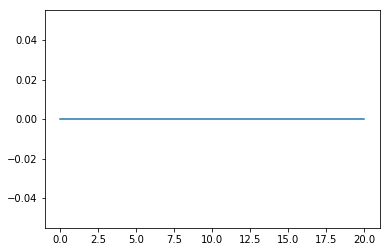

In [263]:
dd = load_data( 'RANDOM', 100 )
plt.plot( np.mean(dd == 0.01, axis=0) )

In [303]:
dd = load_data( 'RANDOM', 1 )
dd.shape

(100, 21)